```environments used:
    - phyluce
    - kraken
    - pathogen_notebook
    - jupyterlab
    - <anything to build probeset>
    - <phylogeny>```

# Prep the environment and get sample info

In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ete3 import NCBITaxa
from tqdm.notebook import tqdm
from Bio import SeqIO
import re
import gzip

In [2]:
proj_dir="/master/nplatt/pathogen_probes/"
os.chdir(proj_dir)

In [3]:
os.chdir("{}/results/seq_analyses/host_id".format(proj_dir))

In [4]:
samples_df=pd.read_csv("{}/results/seq_analyses/sample_info.csv".format(proj_dir))
samples_df

,admera_id,sample_name,i7_seq,i7_name,i5_seq,i5_name,genus,species,location,collection_date,seq_exp_id,r1_md5sum,r2_md5sum,sra,notes
0,c1e-3p_control_enrich,c1e_3p_control_enrich,ATTCAGAA,i7_50,GTCAGTAC,i5_48,control,control,control,control,20201006_104744,na,na,na,original id = 15x-63c65c-1e-3p-exp3_S7
1,c1p_control_enrich,c1p_control_enrich,CGGCTATG,i7_49,GTCAGTAC,i5_48,control,control,control,control,20201006_104744,na,na,na,original id = 15x-63c65c-01p-exp3_S4
2,c1p_control_no_enrich,c1p_control_no_enrich,CTGAAGCT,i7_48,GTCAGTAC,i5_48,control,control,control,control,20201006_104744,na,na,na,original id = 0x-0c-01p-exp3_S1
3,19047FL-44Q2-01-35,tk101275,CCGTAAGA,i7_35,AGAGTCCA,i5_35,Glossophaga,commissarisi,Honduras,7/10/2001,19047-44Q2,na,na,na,na
4,19047FL-44Q2-01-28,tk136205,ACCACGAT,i7_28,GTCTGCAA,i5_28,Heteromys,desmarestianus,Honduras,7/16/2004,19047-44Q2,na,na,na,na
5,19047FL-44Q2-01-18,tk136222,CGGTTGTT,i7_18,GTGGTATG,i5_18,Peromyscus,mexicanus,Honduras,7/17/2004,19047-44Q2,na,na,na,na
6,19047FL-44Q2-01-22,tk136228,CGTGTGTA,i7_22,CCAACGAA,i5_22,Heteromys,desmarestianus,Honduras,7/17/2004,19047-44Q2,na,na,na,na
7,19047FL-44Q2-01-37,tk136240,GAGACGAT,i7_37,ACCGGTTA,i5_37,Glossophaga,soricina,Honduras,7/16/2004,19047-44Q2,na,na,na,na
8,19047FL-44Q2-01-29,tk136756,ATGCCTGT,i7_29,AGATTGCG,i5_29,Eptesicus,furinalis,Honduras,7/17/2004,19047-44Q2,na,na,na,na
9,19047FL-44Q2-01-15,tk136783,AACTGAGC,i7_15,CAATCAGG,i5_15,Glossophaga,leachii,Honduras,7/17/2004,19047-44Q2,na,na,na,na


# Classify reads with Kraken2

## Build a custom Kraken2 database of mitochondrial sequences 

In [ ]:
%%bash 

#using kraken conda env
kraken2-build --download-taxonomy --db mammal_mito_2022-11-01_k2db
kraken2-build --add-to-library ncbi_mammal_mito_2022-11-01.fas  --db mammal_mito_2022-11-01_k2db
kraken2-build --build --threads 12 --db mammal_mito_2022-11-01_k2db

In [ ]:
%%bash 

#using kraken conda env

for SAMPLE in $(ls ../01_clean-fastq); do

    kraken2 \
        --use-names \
        --threads 12 \
        --paired \
        --db mammal_mito_2022-11-01_k2db \
        --report ${SAMPLE}.k2report \
        --confidence 0.2 \
        --report-zero-counts \
        --output ${SAMPLE}.k2out \
        ../01_clean-fastq/${SAMPLE}/split-adapter-quality-trimmed/${SAMPLE}-READ1.fastq.gz \
        ../01_clean-fastq/${SAMPLE}/split-adapter-quality-trimmed/${SAMPLE}-READ1.fastq.gz \
        >${SAMPLE}.log
done


In [ ]:
#convert kraken to csv
%%bash

for SAMPLE in $(ls *k2report | sed s'/.k2report//'); do
    sed 's/,/_/g' ${SAMPLE}.k2report | sed 's/\t/,/g' | sed 's/  \{1,\}//g' | sed 's/^ //' | awk -v S=$SAMPLE '{print $0","S}' >${SAMPLE}.k2report.csv
done

### Post-process the Kraken2 classification results

After each sample has been run against the Kraken2 database we take a few steps to post-process the report files to make it easier to analyze downstream. The end goal is to have start with the raw reports, combine then into a single file, then add relevant taxonomy information.

Convert the reports from white space delimited to CSV

update the NCBI taxonomy database in prep for adding this info to the kraken report (for each entry)

In [7]:
ncbi = NCBITaxa()
ncbi.update_taxonomy_database()

Done. Parsing...


Loading node names...
2464284 names loaded.
286201 synonyms loaded.
Loading nodes...
2464284 nodes loaded.
Linking nodes...
Tree is loaded.
Updating database: /master/nplatt/.etetoolkit/taxa.sqlite ...
 2464000 generating entries... 
Uploading to /master/nplatt/.etetoolkit/taxa.sqlite


Inserting synonyms:          0 

Inserting synonyms:      285000 

Inserting taxids:           0  

Inserting taxids:       2460000 

Combine the reports into a single CSV and save as a pandas dataframe for manipulation in the jupyter notebook.

In [71]:
kraken_csvs=glob.glob('*.k2report.csv')

kraken_columns=["root_perc_frags", "root_num_frags", "taxon_num_frags", "rank", "ncbi_taxa_id", "sci_name", "library_id"]

df=pd.DataFrame()

for csv in kraken_csvs:
    
    #get sample name
    library_id=csv.replace(".k2report.csv", "")
    #open file
    sub_df=pd.read_csv(csv, names=kraken_columns, sep=",", header=None)
    
    #add sample info
    sub_df["library_id"]=library_id
    
    #add to larger pandas df
    df=pd.concat([df, sub_df])

#get rid of everything that doesn't have reads mapping to it
dtypes = { "root_perc_frags" : 'float', 
           "root_num_frags"  : 'int', 
           "taxon_num_frags" : 'int', 
           "rank"            : 'string', 
           "ncbi_taxa_id"    : 'int', 
           "sci_name"        : 'string',
           "library_id"      : 'string'}

df.astype(dtypes)
df = df.loc[df["root_num_frags"]>0].reset_index(drop=True)
df


,root_perc_frags,root_num_frags,taxon_num_frags,rank,ncbi_taxa_id,sci_name,library_id
0,100.0,4705962,4705962,U,0,unclassified,tk93289
1,0.0,145,0,R,1,root,tk93289
2,0.0,145,0,R1,131567,cellular organisms,tk93289
3,0.0,145,0,D,2759,Eukaryota,tk93289
4,0.0,145,0,D1,33154,Opisthokonta,tk93289
...,...,...,...,...,...,...,...
1405,0.0,81,0,O1,30560,Microchiroptera,tk136783
1406,0.0,81,28,F,9415,Phyllostomidae,tk136783
1407,0.0,53,23,F1,40236,Glossophaginae,tk136783
1408,0.0,30,0,G,27637,Glossophaga,tk136783


## add taxon rank info to each kraken entry

In [72]:
#get all ncbi taxanomic ranks:
lineages=[]
uniq_taxa=df["ncbi_taxa_id"].unique()

#make sure they are uniq
ranks=set()

#get the taxanonmic info for each ncbi taxanomic id (including lineage)
for taxon in uniq_taxa:
    try:
        lineage = ncbi.get_lineage(taxon)
        ranks= ranks | set(ncbi.get_rank(lineage).values())
    except:
        continue
        
#manually set major ranks (ex. care about phylum not serogroups)
major_ranks = [ "superkingdom", "kingdom", "phylum", "class", "order", "family", "genus", "species"]
 
#add them to the df
for rank in major_ranks:
    df[rank] = np.nan
    
# add the taxonomic name for each rank column (ex. for mammals class will be "mammalia"
#  should make it easier to sort
for index, row in df.iterrows():
#for index, row in df.iterrows():

    ncbi_id=row["ncbi_taxa_id"]
    lineage = np.nan
    taxids = np.nan
    ranks = np.nan
    tax = np.nan
    rank = np.nan
    try:
        lineage = ncbi.get_lineage(ncbi_id)
        taxids=ncbi.get_taxid_translator(lineage)
        ranks=ncbi.get_rank(lineage)

        for ncbi_taxa_id in taxids.keys():            
            tax=taxids[ncbi_taxa_id]
            rank=ranks[ncbi_taxa_id]
            if rank in df.columns:
                df.loc[index, rank]=tax
        
    except:
        continue
    
df

,root_perc_frags,root_num_frags,taxon_num_frags,rank,ncbi_taxa_id,sci_name,library_id,superkingdom,kingdom,phylum,class,order,family,genus,species
0,100.0,4705962,4705962,U,0,unclassified,tk93289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,145,0,R,1,root,tk93289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,145,0,R1,131567,cellular organisms,tk93289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,145,0,D,2759,Eukaryota,tk93289,Eukaryota,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,145,0,D1,33154,Opisthokonta,tk93289,Eukaryota,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405,0.0,81,0,O1,30560,Microchiroptera,tk136783,Eukaryota,Metazoa,Chordata,Mammalia,Chiroptera,NaN,NaN,NaN
1406,0.0,81,28,F,9415,Phyllostomidae,tk136783,Eukaryota,Metazoa,Chordata,Mammalia,Chiroptera,Phyllostomidae,NaN,NaN
1407,0.0,53,23,F1,40236,Glossophaginae,tk136783,Eukaryota,Metazoa,Chordata,Mammalia,Chiroptera,Phyllostomidae,NaN,NaN
1408,0.0,30,0,G,27637,Glossophaga,tk136783,Eukaryota,Metazoa,Chordata,Mammalia,Chiroptera,Phyllostomidae,Glossophaga,NaN


In [73]:
df.loc[df["sci_name"] == "unclassified", ["superkingdom", "kingdom", "phylum", "class", "order", "family", "genus", "species"]] = "unclassified"

In [74]:
df["sample_id"] = df["library_id"].str.replace('tk','TK')
df

,root_perc_frags,root_num_frags,taxon_num_frags,rank,ncbi_taxa_id,sci_name,library_id,superkingdom,kingdom,phylum,class,order,family,genus,species,sample_id
0,100.0,4705962,4705962,U,0,unclassified,tk93289,unclassified,unclassified,unclassified,unclassified,unclassified,unclassified,unclassified,unclassified,TK93289
1,0.0,145,0,R,1,root,tk93289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TK93289
2,0.0,145,0,R1,131567,cellular organisms,tk93289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TK93289
3,0.0,145,0,D,2759,Eukaryota,tk93289,Eukaryota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TK93289
4,0.0,145,0,D1,33154,Opisthokonta,tk93289,Eukaryota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TK93289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405,0.0,81,0,O1,30560,Microchiroptera,tk136783,Eukaryota,Metazoa,Chordata,Mammalia,Chiroptera,NaN,NaN,NaN,TK136783
1406,0.0,81,28,F,9415,Phyllostomidae,tk136783,Eukaryota,Metazoa,Chordata,Mammalia,Chiroptera,Phyllostomidae,NaN,NaN,TK136783
1407,0.0,53,23,F1,40236,Glossophaginae,tk136783,Eukaryota,Metazoa,Chordata,Mammalia,Chiroptera,Phyllostomidae,NaN,NaN,TK136783
1408,0.0,30,0,G,27637,Glossophaga,tk136783,Eukaryota,Metazoa,Chordata,Mammalia,Chiroptera,Phyllostomidae,Glossophaga,NaN,TK136783


In [75]:
col_order = ['sample_id', 'library_id', 'root_perc_frags', 'root_num_frags', 'taxon_num_frags', 'rank',
       'ncbi_taxa_id', 'sci_name', 'superkingdom', 'kingdom',
       'phylum', 'class', 'order', 'family', 'genus', 'species']

df.reindex(columns=col_order)

,sample_id,library_id,root_perc_frags,root_num_frags,taxon_num_frags,rank,ncbi_taxa_id,sci_name,superkingdom,kingdom,phylum,class,order,family,genus,species
0,TK93289,tk93289,100.0,4705962,4705962,U,0,unclassified,unclassified,unclassified,unclassified,unclassified,unclassified,unclassified,unclassified,unclassified
1,TK93289,tk93289,0.0,145,0,R,1,root,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TK93289,tk93289,0.0,145,0,R1,131567,cellular organisms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TK93289,tk93289,0.0,145,0,D,2759,Eukaryota,Eukaryota,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TK93289,tk93289,0.0,145,0,D1,33154,Opisthokonta,Eukaryota,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405,TK136783,tk136783,0.0,81,0,O1,30560,Microchiroptera,Eukaryota,Metazoa,Chordata,Mammalia,Chiroptera,NaN,NaN,NaN
1406,TK136783,tk136783,0.0,81,28,F,9415,Phyllostomidae,Eukaryota,Metazoa,Chordata,Mammalia,Chiroptera,Phyllostomidae,NaN,NaN
1407,TK136783,tk136783,0.0,53,23,F1,40236,Glossophaginae,Eukaryota,Metazoa,Chordata,Mammalia,Chiroptera,Phyllostomidae,NaN,NaN
1408,TK136783,tk136783,0.0,30,0,G,27637,Glossophaga,Eukaryota,Metazoa,Chordata,Mammalia,Chiroptera,Phyllostomidae,Glossophaga,NaN


In [76]:
#save to a csv file
df.to_csv("host_report.csv", sep=',', index=False, header=True)

# Analyze read class db

In [5]:
df=pd.read_csv("host_report.csv", sep=',')

In [78]:
#what is the max number of reads found for each genus in a single sample
genus_max_count = df.loc[df["genus"] != "unclassified"].groupby(['genus'], sort=False)['root_num_frags'].max()
genus_max_count

genus
Carollia             16
Peromyscus         1430
Mastomys            600
Stenocephalemys      35
Antidorcas            1
Myocastor             1
Gerbilliscus       1304
Myomyscus             4
Dasymys               1
Neotoma               2
Hypsugo               1
Lutreolina         2405
Didelphis            59
Mus                1305
Eospalax              1
Glossophaga        1177
Vespertilio           6
Plecotus              3
Tapirus               1
Dasycercus            1
Lepilemur             1
Dasypus              93
Hippopotamus          5
Habromys              2
Onychomys             1
Neotomodon            1
Eothenomys            1
Tamiops               1
Myotis              166
Artibeus              4
Arvicanthis           1
Toromys               1
Alouatta              1
Paruromys             1
Poecilogale           1
Antilope              1
Cephalorhynchus       1
Halmaheramys         16
Hylomyscus            1
Papio                 1
Cricetus              1
Mico      

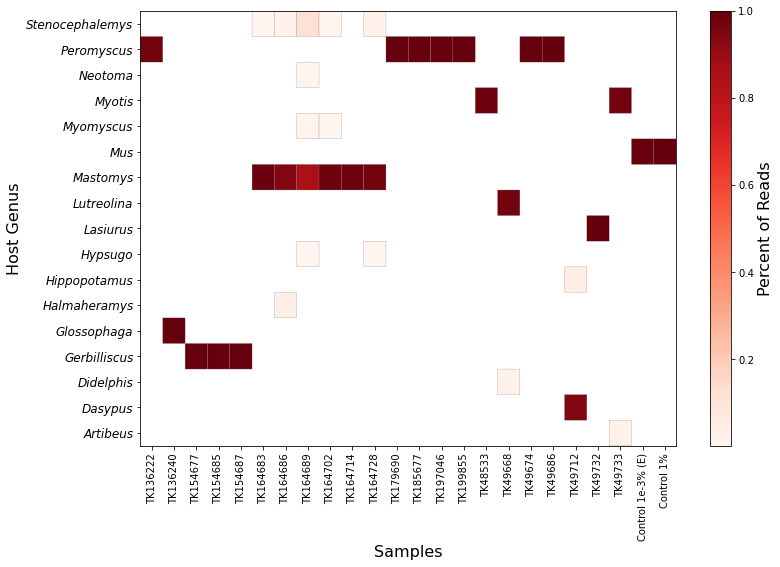

In [79]:
class_agg=df[df["genus"] != "unclassified"].groupby(['sample_id','genus']).agg({'taxon_num_frags': 'sum'}).reset_index()

class_piv=class_agg.pivot(index="sample_id", columns="genus", values="taxon_num_frags").fillna(0)
class_piv = class_piv.loc[class_piv.sum(axis=1)>50]
x = class_piv.sum(axis=0)>1
#class_piv = pd.concat([tk101275_entry_df.transpose(),class_piv.loc[:]])

# #drop controls
# #class_piv=class_piv.drop(labels=["unclassified"], axis=1)
class_piv.replace(0, np.nan, inplace=True)
class_piv = class_piv.div(class_piv.sum(axis=1), axis=0)
class_piv = class_piv.loc[:, x]

# class_piv=class_piv[3:]

class_piv= class_piv.rename(index={"c1e_3p_control_enrich": "Control 1e-3% (E)", 
                        "c1p_control_enrich":    "Control 1% (E)", 
                        "c1p_control_no_enrich": "Control 1%"})


plt.figure(figsize=(12,8))
plt.pcolor(class_piv.T, cmap="Reds", edgecolor='grey')
plt.colorbar().set_label('Percent of Reads', size=16)
plt.yticks(np.arange(0.5, len(class_piv.columns), 1), class_piv.columns, style="italic", size=12)
plt.xticks(np.arange(0.5, len(class_piv.index), 1), class_piv.index, rotation='vertical')
plt.ylabel('Host Genus', size = 16)
plt.xlabel('Samples', size = 16)
plt.savefig('host_heatmap_genus.svg', facecolor="white")
plt.savefig('host_heatmap_genus.png', facecolor="white")

plt.show()

In [15]:
class_agg=df[df["genus"] != "unclassified"].groupby(['sample_id','genus']).agg({'taxon_num_frags': 'sum'}).reset_index()

class_piv=class_agg.pivot(index="sample_id", columns="genus", values="taxon_num_frags").fillna(0)
class_piv = class_piv.loc[class_piv.sum(axis=1)>50]
x = class_piv.sum(axis=0)>1
#class_piv = pd.concat([tk101275_entry_df.transpose(),class_piv.loc[:]])

# #drop controls
# #class_piv=class_piv.drop(labels=["unclassified"], axis=1)
class_piv.replace(0, np.nan, inplace=True)
class_piv = class_piv.div(class_piv.sum(axis=1), axis=0)
class_piv = class_piv.loc[:, x]

# class_piv=class_piv[3:]

class_piv= class_piv.rename(index={"c1e_3p_control_enrich": "Control 1e-3% (E)", 
                        "c1p_control_enrich":    "Control 1% (E)", 
                        "c1p_control_no_enrich": "Control 1%"})



In [20]:
class_piv.max(axis=1).mean()

0.9830745352739362